# Impact Analysis of Mass Layoff in Various Domains Using Machine Learning with real time data set

# Objective : The objective of this project is to analyze the layoffs dataset and identify potential factors that contribute to mass layoffs in the tech industry. The project will aim to study the pattern and relationship between company financial performance and layoffs., Reasons cited to layoff for better understanding of the company’s situation and pattern among the reasons cited along with trends formed with specific to geographic location.

# Importing all the required Libraries

In [108]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

# Loading the Data File¶

In [109]:
layoff =pd.read_csv('C:/data/python_data/layoffs_data.csv')

layoff

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,https://www.businessnewsaustralia.com/articles...,105.0,Series B,2023-05-02 16:26:35,Australia,Unknown
1,Lev,New York City,Real Estate,34.0,NaN,2023-05-01,https://therealdeal.com/new-york/2023/05/01/cr...,114.0,Series B,2023-05-01 23:51:06,United States,Unknown
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,2023-05-01,https://www.dealstreetasia.com/stories/pharmea...,1600.0,Unknown,2023-05-02 16:23:27,India,Unknown
3,Cogito,New Delhi,Data,177.0,NaN,2023-04-29,https://inc42.com/buzz/protests-erupt-data-sta...,NaN,Unknown,2023-05-01 14:36:18,India,Unknown
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,https://www.sec.gov/Archives/edgar/data/162894...,899.0,Post-IPO,2023-05-01 23:57:54,United States,https://docs.google.com/spreadsheets/d/1P5d2Cr...
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
2549,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
2550,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown
2551,Blackbaud,Charleston,Other,500.0,0.14,NaN,https://www.postandcourier.com/business/sc-tec...,NaN,Post-IPO,2023-02-15 19:06:44,United States,Unknown


# Data pre-processing

In [110]:
layoff.shape

(2553, 12)

In [111]:
layoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2553 non-null   object 
 1   Location_HQ                 2553 non-null   object 
 2   Industry                    2553 non-null   object 
 3   Laid_Off_Count              1752 non-null   float64
 4   Percentage                  1699 non-null   float64
 5   Date                        2551 non-null   object 
 6   Source                      2553 non-null   object 
 7   Funds_Raised                2302 non-null   float64
 8   Stage                       2553 non-null   object 
 9   Date_Added                  2553 non-null   object 
 10  Country                     2553 non-null   object 
 11  List_of_Employees_Laid_Off  2552 non-null   object 
dtypes: float64(3), object(9)
memory usage: 239.5+ KB


In [112]:
layoff.isnull().sum()

Company                         0
Location_HQ                     0
Industry                        0
Laid_Off_Count                801
Percentage                    854
Date                            2
Source                          0
Funds_Raised                  251
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      1
dtype: int64

In [113]:
# Replace missing values in columns with mode
layoff['Laid_Off_Count'].fillna(layoff['Laid_Off_Count'].mode()[0], inplace=True)
layoff['Percentage'].fillna(layoff['Percentage'].mode()[0], inplace=True)
layoff['Date'].fillna(layoff['Date'].mode()[0], inplace=True)
layoff['Funds_Raised'].fillna(layoff['Funds_Raised'].mode()[0], inplace=True)
#layoff['List_Of_Employees_Laid_Off'].fillna(0)



In [114]:
layoff.isnull().sum()

Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
List_of_Employees_Laid_Off    1
dtype: int64

In [115]:
layoff.corr(numeric_only=True).T

,Laid_Off_Count,Percentage,Funds_Raised
Laid_Off_Count,1.000000,-0.033257,0.090940
Percentage,-0.033257,1.000000,-0.053562
Funds_Raised,0.090940,-0.053562,1.000000


In [116]:
layoff.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,https://www.businessnewsaustralia.com/articles...,105.0,Series B,2023-05-02 16:26:35,Australia,Unknown
1,Lev,New York City,Real Estate,34.0,0.10,2023-05-01,https://therealdeal.com/new-york/2023/05/01/cr...,114.0,Series B,2023-05-01 23:51:06,United States,Unknown
2,PharmEasy,Mumbai,Healthcare,100.0,0.10,2023-05-01,https://www.dealstreetasia.com/stories/pharmea...,1600.0,Unknown,2023-05-02 16:23:27,India,Unknown
3,Cogito,New Delhi,Data,177.0,0.10,2023-04-29,https://inc42.com/buzz/protests-erupt-data-sta...,2.0,Unknown,2023-05-01 14:36:18,India,Unknown
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,https://www.sec.gov/Archives/edgar/data/162894...,899.0,Post-IPO,2023-05-01 23:57:54,United States,https://docs.google.com/spreadsheets/d/1P5d2Cr...


In [117]:
print(layoff)

            Company     Location_HQ        Industry  Laid_Off_Count  \
0             Zoomo          Sydney  Transportation            27.0   
1               Lev   New York City     Real Estate            34.0   
2         PharmEasy          Mumbai      Healthcare           100.0   
3            Cogito       New Delhi            Data           177.0   
4        Cue Health       San Diego      Healthcare           326.0   
...             ...             ...             ...             ...   
2548    Panda Squad     SF Bay Area        Consumer             6.0   
2549  Tamara Mellon     Los Angeles          Retail            20.0   
2550       EasyPost  Salt Lake City       Logistics            75.0   
2551      Blackbaud      Charleston           Other           500.0   
2552           Open       Bengaluru         Finance            47.0   

      Percentage        Date  \
0           0.08  2023-05-02   
1           0.10  2023-05-01   
2           0.10  2023-05-01   
3           0.10  2

In [118]:
# for the purpose fo plotting the data is being processed here 

layoff2=layoff[(layoff['Laid_Off_Count']>=500)]
layoff2=layoff2[(layoff2['Percentage']>0.1)]
print(layoff2['Percentage'])

7       0.16
24      0.40
27      0.26
37      0.22
74      0.40
        ... 
2307    0.45
2328    0.50
2382    0.35
2530    0.98
2551    0.14
Name: Percentage, Length: 85, dtype: float64


# Visualization

# In the visualization as i have taken the unsupervised learning concept , so analyzing the regions and features contributing using scatter plot, pie chart and bar graph to learn the relationships

# Bar Plot -- showing the relationship between Laid_off_count vs Country

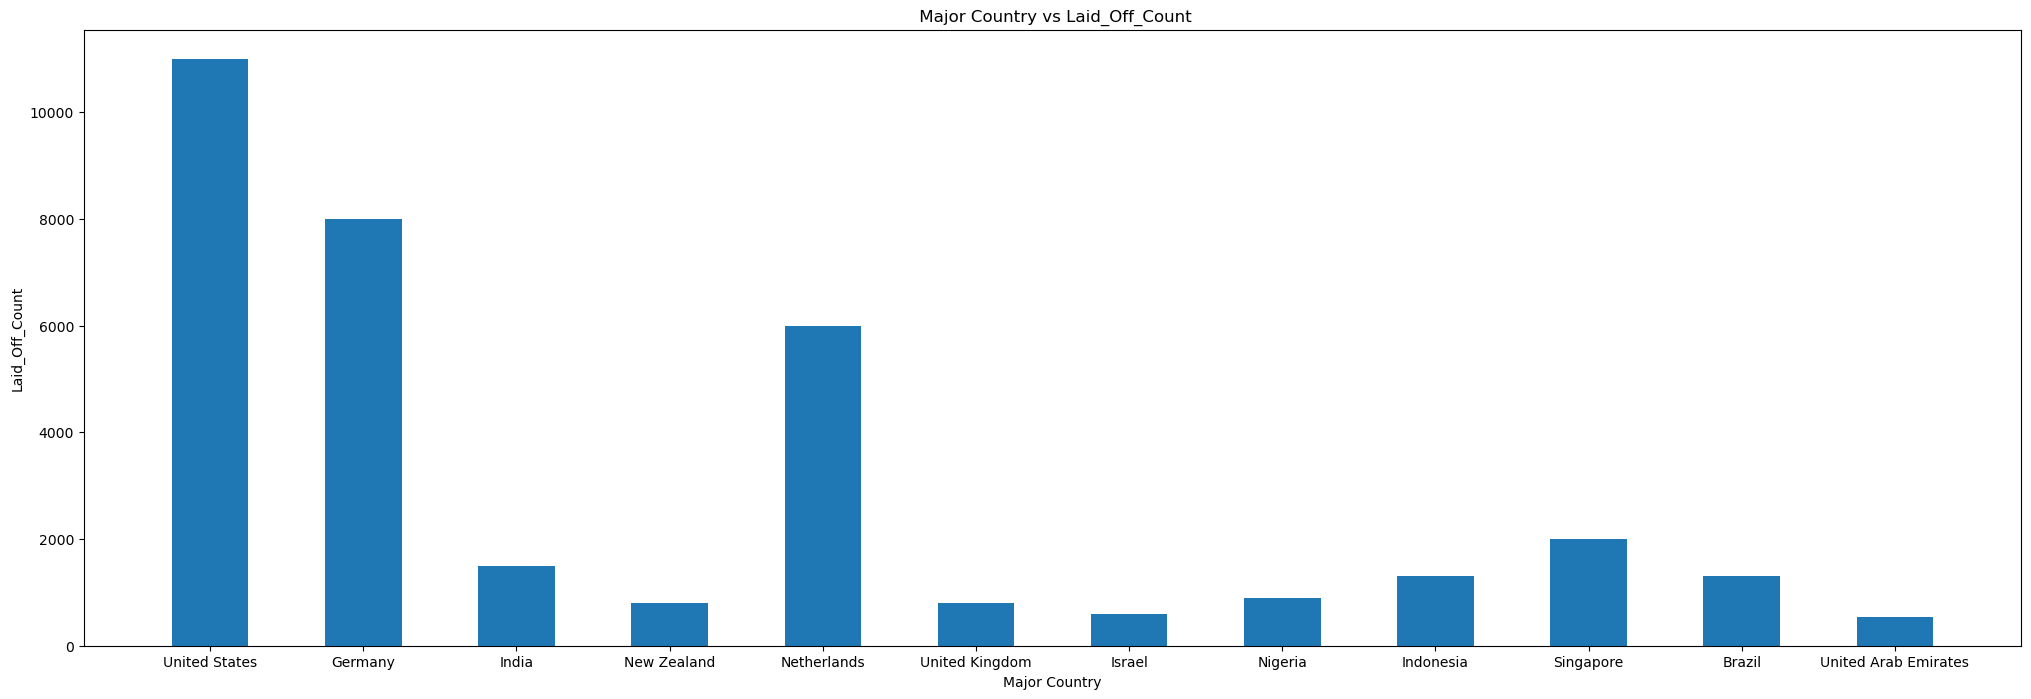

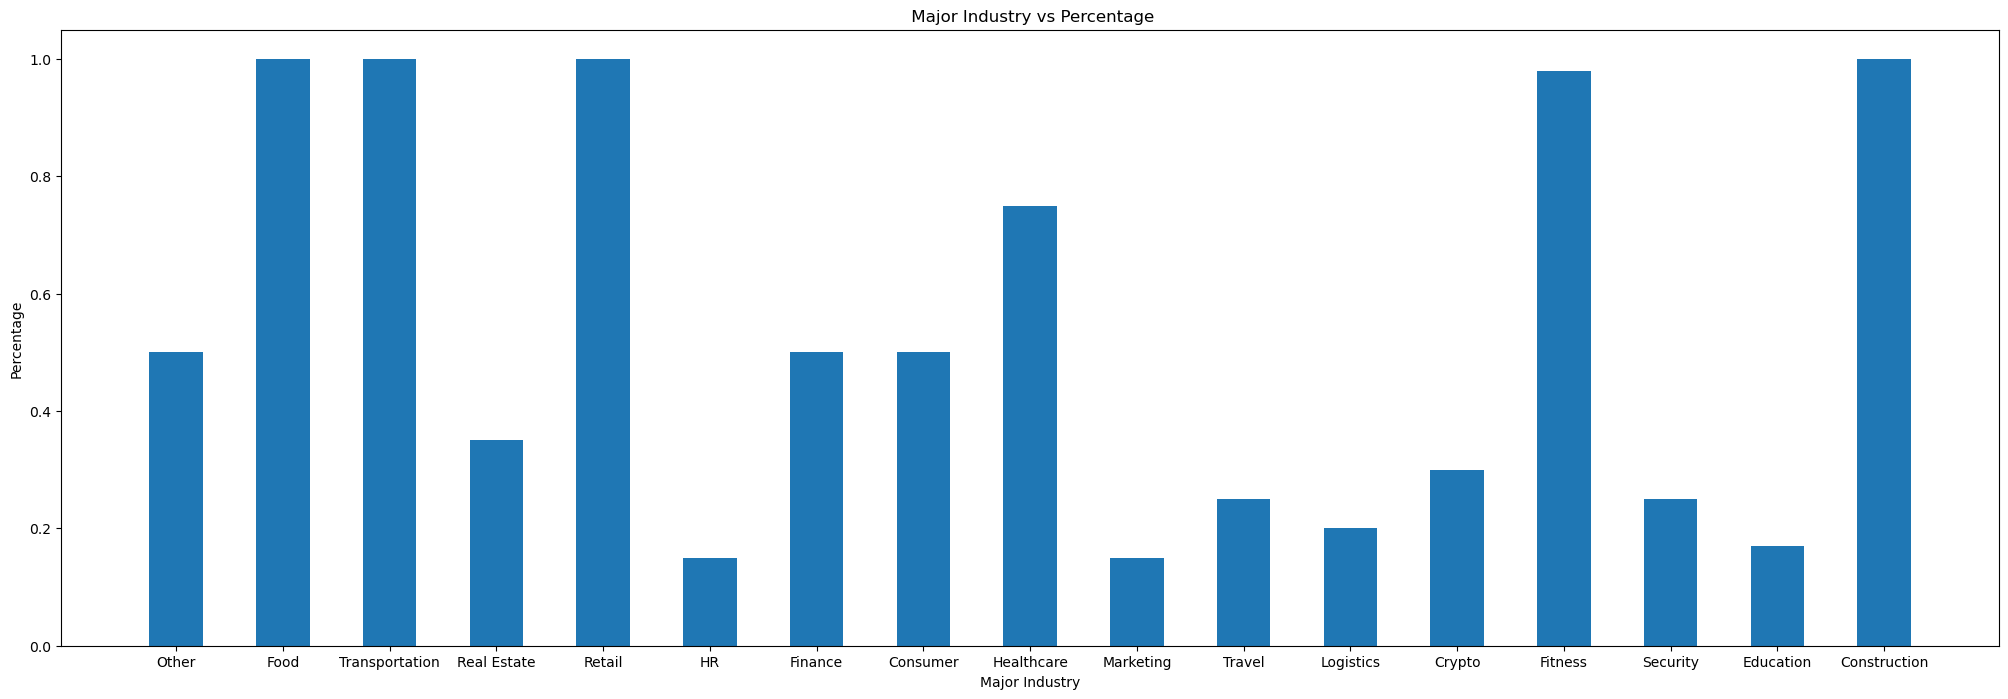

In [119]:
#combinations = [('Location_HQ', 'Laid_Off_Count'),('Laid_Off_Company','Percentage')]## throwing error
combinations = [('Country','Laid_Off_Count'),('Industry','Percentage')]
# Create a bar plot for each combination
for i, (x_col, y_col) in enumerate(combinations):
    val_x=layoff2[x_col]
    val_y=layoff2[y_col]
    #print(val_x)
    fig = plt.figure(figsize = (25,8))
    plt.bar(val_x,val_y,width=0.50)
    plt.title(f" Major {x_col} vs {y_col}")
    plt.xlabel("Major "+x_col)
    plt.ylabel(y_col)
    plt.show()
# Show all the bar plots

# Scatter  Plot - showing relationship between Laid_off_count , percentage, Funds_raised and industry

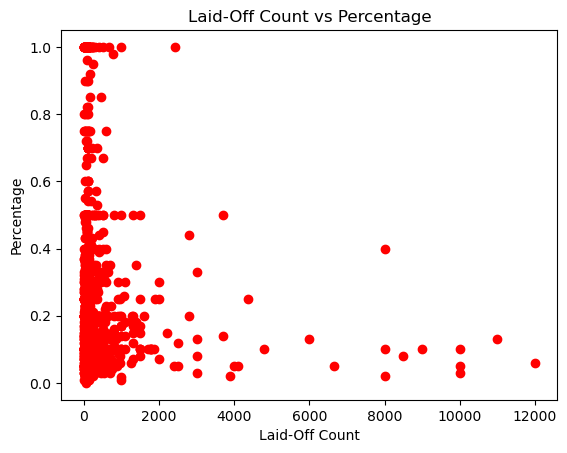

In [120]:
x = layoff['Laid_Off_Count']
y = layoff['Percentage']

# Create a scatter plot
plt.scatter(x, y, c ='red')

# Set the title and axis labels
plt.title('Laid-Off Count vs Percentage')
plt.xlabel('Laid-Off Count')
plt.ylabel('Percentage')

# Show the plot
plt.show()

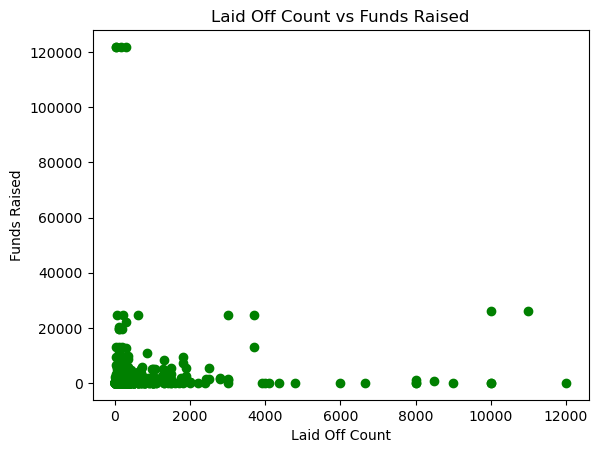

In [121]:
# Select the columns for x and y axes
x = layoff["Laid_Off_Count"]
y = layoff["Funds_Raised"]

# Create the scatter plot
plt.scatter(x, y,c ='green')

# Add title and axis labels
plt.title("Laid Off Count vs Funds Raised")
plt.xlabel("Laid Off Count")
plt.ylabel("Funds Raised")

# Display the scatter plot
plt.show()







Text(0, 0.5, 'Funds Raised')

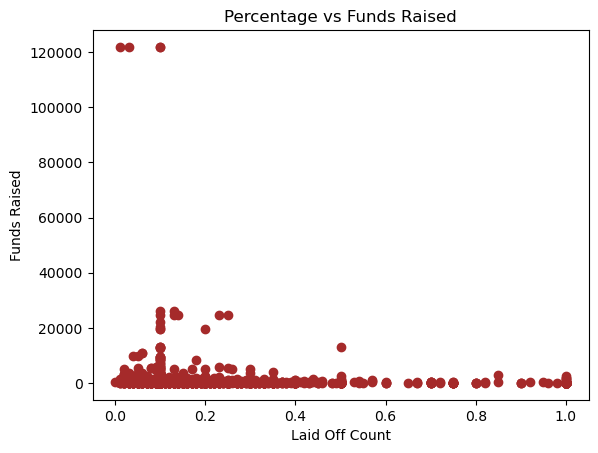

In [122]:
# Select the columns for x and y axes
x = layoff["Percentage"]
y = layoff["Funds_Raised"]

# Create the scatter plot
plt.scatter(x, y,c ='Brown')

# Add title and axis labels
plt.title("Percentage vs Funds Raised")
plt.xlabel("Laid Off Count")
plt.ylabel("Funds Raised")

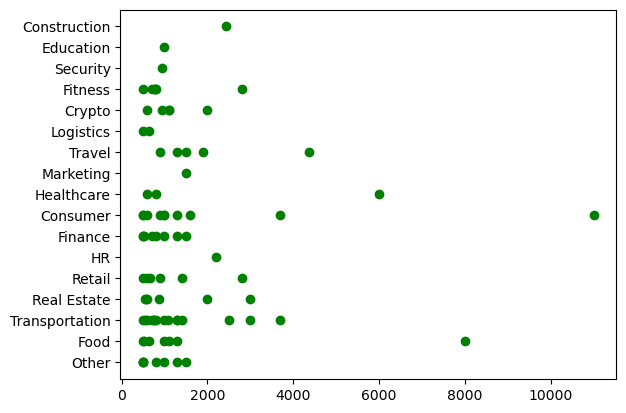

In [123]:
plt.scatter(layoff2['Laid_Off_Count'],layoff2['Industry'], c = 'green')
plt.show()

# Pie - Chart to study the distribution of peopel laid_off_count with Industry.

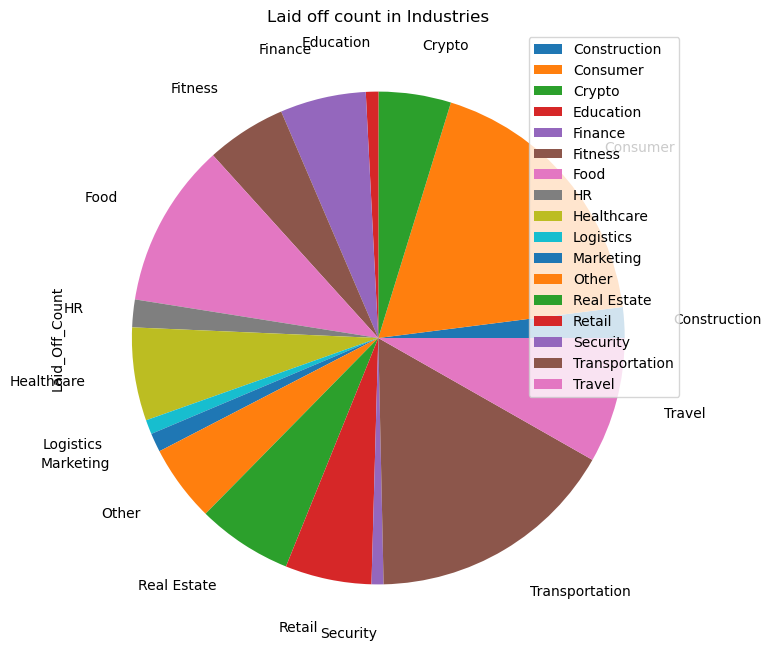

In [124]:
# Create a pie chart of the industries and their percentages
layoff2.groupby(['Industry']).sum().plot(kind='pie', y='Laid_Off_Count',figsize=(8,8), labeldistance=1.2)
plt.title("Laid off count in Industries")
plt.show()

# Model Training

# K-Means Clustering - 1

# Selecting the cluster variables

In [125]:
X = layoff.iloc[:, [3,4]].values
X

array([[2.7e+01, 8.0e-02],
       [3.4e+01, 1.0e-01],
       [1.0e+02, 1.0e-01],
       ...,
       [7.5e+01, 1.0e-01],
       [5.0e+02, 1.4e-01],
       [4.7e+01, 1.0e-01]])

In [126]:
X = layoff.iloc[:, [3, 4, 7]].values

# Normalize the data using standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



# Using the elbow method to find the optimal number of clusters

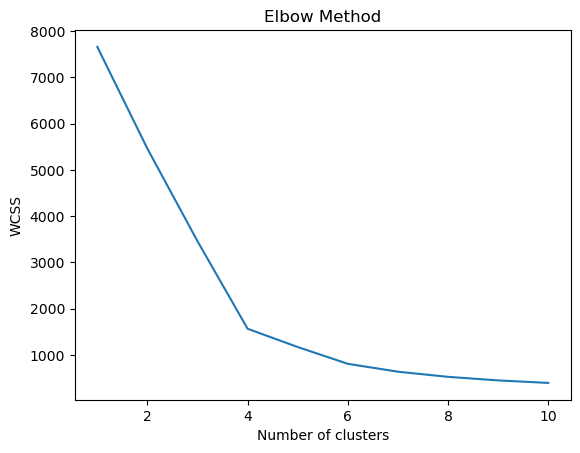

            Industry  Laid_Off_Count  Percentage  Cluster
0     Transportation            27.0        0.08        0
1        Real Estate            34.0        0.10        0
2         Healthcare           100.0        0.10        0
3               Data           177.0        0.10        0
4         Healthcare           326.0        0.30        0
...              ...             ...         ...      ...
2548        Consumer             6.0        0.75        1
2549          Retail            20.0        0.40        0
2550       Logistics            75.0        0.10        0
2551           Other           500.0        0.14        0
2552         Finance            47.0        0.10        0

[2553 rows x 4 columns]


In [127]:
import warnings
# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
layoff['Cluster'] = y_kmeans

# View the resulting clusters
print(layoff[['Industry', 'Laid_Off_Count', 'Percentage', 'Cluster']])

# Training the K-Means model on the dataset

In [128]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

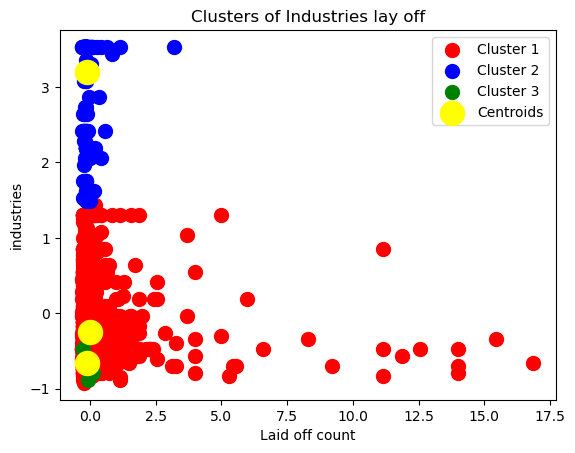

In [129]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Industries lay off')
plt.ylabel('industries')
plt.xlabel('Laid off count')
plt.legend()
plt.show()

# Hierarchical Clustering - 1

# Selecting the cluster variables

In [130]:
X = layoff.iloc[:, [3,4]].values
X

array([[2.7e+01, 8.0e-02],
       [3.4e+01, 1.0e-01],
       [1.0e+02, 1.0e-01],
       ...,
       [7.5e+01, 1.0e-01],
       [5.0e+02, 1.4e-01],
       [4.7e+01, 1.0e-01]])

# Using the dendrogram to find the optimal number of clusters

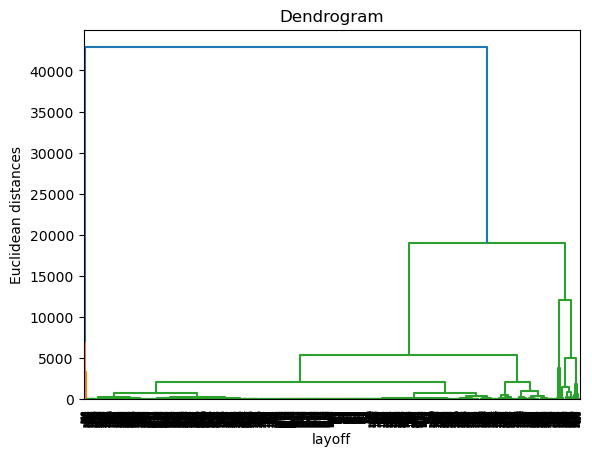

In [131]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('layoff')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset

In [132]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters

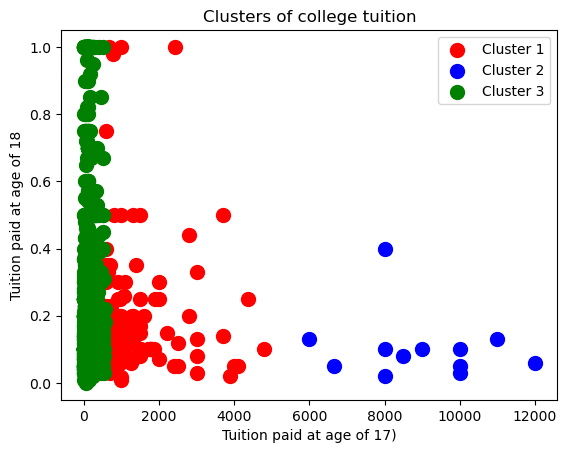

In [42]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of college tuition')
plt.xlabel('percentage of laid off' )
plt.ylabel('industries count')
plt.legend()
plt.show()

# K-Means Clustering - 2

# Selecting the cluster variables

In [43]:
X = layoff.iloc[:, [3,4]].values
X

array([[2.7e+01, 8.0e-02],
       [3.4e+01, 1.0e-01],
       [1.0e+02, 1.0e-01],
       ...,
       [7.5e+01, 1.0e-01],
       [5.0e+02, 1.4e-01],
       [4.7e+01, 1.0e-01]])

In [44]:
# Standardize the data
X = (X - X.mean()) / X.std()

# Using the elbow method to find the optimal number of clusters

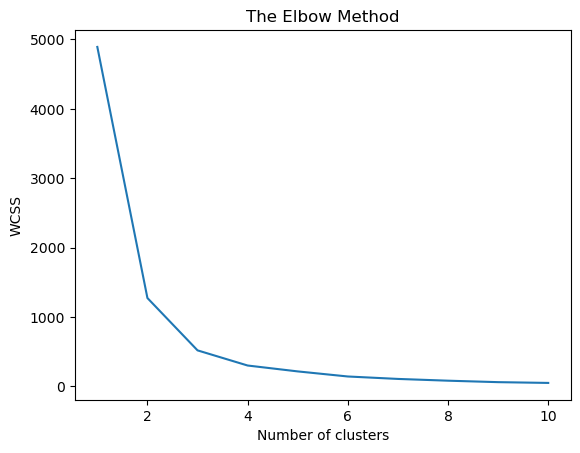

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [46]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

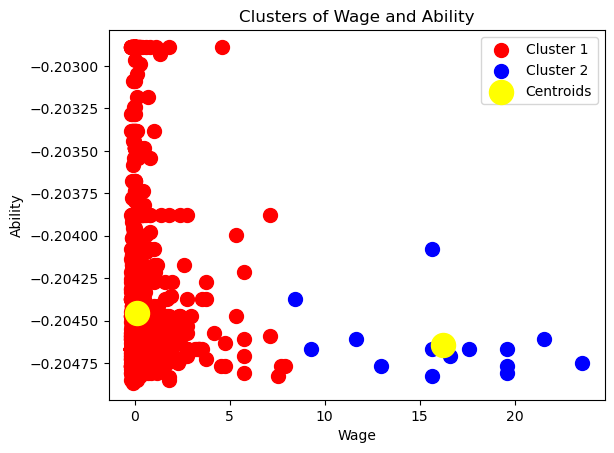

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of layoff percentage count, industries')
plt.xlabel('counts')
plt.ylabel('industries')
plt.legend()
plt.show()

# Hierarchical Clustering - 2

# Selecting the cluster variables

In [48]:
X = layoff.iloc[:, [3,4]].values
X

array([[2.7e+01, 8.0e-02],
       [3.4e+01, 1.0e-01],
       [1.0e+02, 1.0e-01],
       ...,
       [7.5e+01, 1.0e-01],
       [5.0e+02, 1.4e-01],
       [4.7e+01, 1.0e-01]])

# Using the dendrogram to find the optimal number of clusters

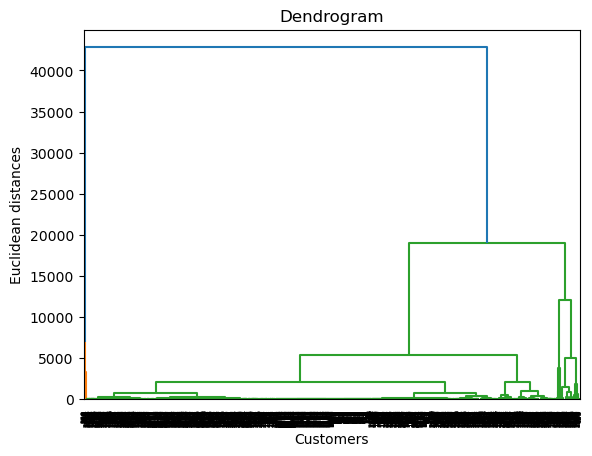

In [49]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('layoff counts with industries')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset

In [50]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters

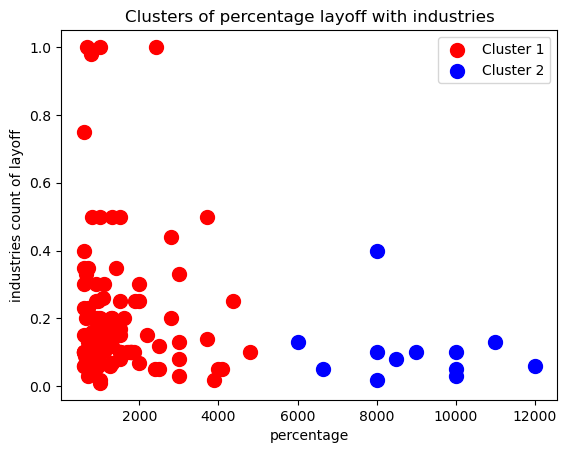

In [133]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of percentage layoff with industries')
plt.xlabel('percentage')
plt.ylabel('industries count of layoff')
plt.legend()
plt.show()

# On absorbing the model with 2 and 3 clusters under k means clustering as well as hierarchial clustering methid, its obvious that model with k =2 performs welland shows the area and highest laid off area 

## DBCAN MODEL

In [61]:
numeric_cols = layoff.select_dtypes(include=['float64', 'int64']).columns
df_numeric = layoff[numeric_cols]



array([ -1,   0,   1, ...,  -1, 117,  -1], dtype=int64)

In [ ]:
# Apply DBSCAN on the numeric data
clustering = DBSCAN(eps=3, min_samples=2).fit(df_numeric)
clustering.labels_

# Affinity Propagation Model

In [64]:
from sklearn.cluster import AffinityPropagation
numeric_cols = layoff.select_dtypes(include=['float64', 'int64']).columns
df_numeric = layoff[numeric_cols]



C:\Users\Dell5320\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [ ]:
# Apply clustering algorithm to numeric data
clustering = AffinityPropagation(random_state=5).fit(df_numeric)
labels = clustering.labels_

In [ ]:
# Add the cluster labels to the original DataFrame
layoff['cluster'] = labels

In [65]:
clustering.labels_

array([126, 159,  54, ...,  58,  80, 159], dtype=int64)

# Gaussian Mixture Model

In [67]:
from sklearn.mixture import GaussianMixture
numeric_layoff = layoff.select_dtypes(include=['float64', 'int64'])


In [ ]:
gm = GaussianMixture(n_components=3, random_state=0).fit(numeric_layoff)
cluster = gm.predict(numeric_layoff)

In [68]:
gm.predict(numeric_layoff)

array([0, 0, 2, ..., 0, 2, 0], dtype=int64)

# PCA - Model

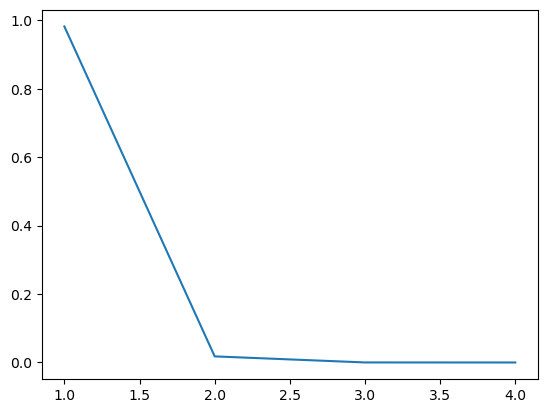

In [72]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

layoff_numeric = layoff.select_dtypes(include=[np.number])
pca = PCA(n_components=4)


In [ ]:
pca.fit(layoff_numeric)
plt.plot(np.arange(1,5),pca.explained_variance_ratio_)

# CCA Model

In [84]:
X = layoff[['Percentage']]
Y = layoff[['Funds_Raised']]

# Fit the CCA model
cca = CCA(n_components=1)
cca.fit(X, Y)

# Transform the X and Y variables
X_c, Y_c = cca.transform(X, Y)

# Print the canonical correlations
print(cca.score(X, Y))






-0.8928768872478015


In [85]:
# Print the loadings
print(cca.x_loadings_)
print(cca.y_loadings_)

[[1.]]
[[-1.]]


In [86]:
# Print the transformed variables
print(X_c)
print(Y_c)

[[-0.56644117]
 [-0.47743179]
 [-0.47743179]
 ...
 [-0.47743179]
 [-0.29941302]
 [-0.47743179]]
[[ 0.121552  ]
 [ 0.11981231]
 [-0.16742891]
 ...
 [ 0.13952874]
 [ 0.14146172]
 [ 0.10512165]]


# Conclusion : On training around 6 models , and observing its working nature, as its a un-supervised learning model its accuracy is observed using the cluster distance and other prediction values in models like dbscan, gaussian mixture , CCA nd PCA model.


# Therefore, It is found that from the model performance the k means clustering gives more optimized output in predicting and analyzing the layoff trends and PCA model also gives the most accurate prediction.

# AS , i have dealt with a real value dataset and cannot be mocked up to get a impressive structure, from the recent 10 months layoff data , it is obvious that several technical companies are affected but on the whole the industry that got hit a lot is tranportation and there are still industries that are affected. Healthcare is the one that got affected less. We can even say that the tourism industry has affected a lot.

# On the whole if the same pattern develops there are more industries that has possible threat to join this queue of affected parts,